In [72]:
from __future__ import division
import numpy as np
import scipy.sparse as spar
import scipy.sparse.linalg as sparla
import matplotlib.pyplot as plt

In [190]:
def finite_element(x, eps, alpha, beta):
    N = len(x) - 1 
    
    h = [1] + [x[i]-x[i-1] for i in xrange(1,N+1)] + [1]
    
    def a(i, j):
        if j == i+1:
            return eps/h[i+1] + .5
        if j == i:
            return -eps/h[i] - eps/h[i+1]
        if j == i-1:
            return eps/h[i] - .5
        else:
            return 0

    def l(j):
        return -.5*(h[j]+h[j+1])

    def genA(N):
        index = np.arange(N+1)

        main = zip(index,index)[1:-1]
        sup = zip(index, np.roll(index, 1))[2:]
        sub = zip(np.roll(index, 1), index)[1:-1]

        d_main = [1]+[a(*m) for m in main]+[1]
        d_sup = [0,0]+[a(*s) for s in sup]
        d_sub = [a(*s) for s in sub]+[0,0]

        A = spar.spdiags(np.vstack((d_main, d_sup, d_sub)), (0,1,-1), N+1, N+1)

        return A.tocsr()

    def genPhi(N):
        return [alpha]+[l(j) for j in np.arange(1,N)]+[beta]
    
    k = sparla.spsolve(genA(N), genPhi(N))
    return k

## Problem 1
$$\epsilon y'' - y' = -1 $$
$$y(0) = \alpha$$
$$y(1) = \beta$$
where $\alpha=2$, $\beta=4$, and $\epsilon=0.02$

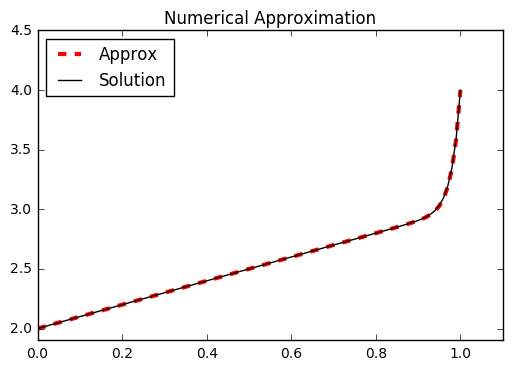

In [204]:
eps = 0.02
alpha = 2
beta = 4
N = 100
x = np.linspace(0,1,N+1)

k = finite_element(x, eps, alpha, beta)
sol = lambda x : alpha + x + (beta - alpha - 1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)

plt.plot(x, k, "r--", lw=3, label="Approx")
plt.plot(x, sol(x), "k", label="Solution")
plt.legend(loc='upper left')
plt.xlim(0,1.1)
plt.ylim(1.9,4.5)
plt.title("Numerical Approximation")
plt.show()

## Problem 2

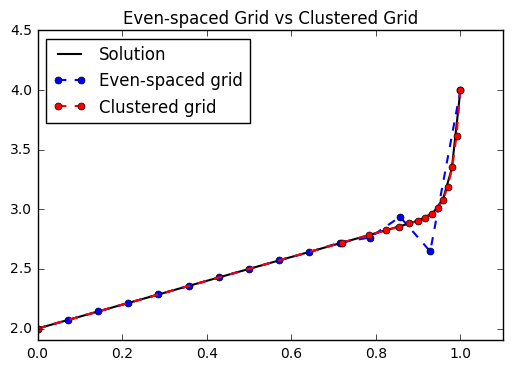

In [192]:
eps = 0.02
alpha = 2
beta = 4

even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1/8)

k1 = finite_element(even_grid, eps, alpha, beta)
k2 = finite_element(clustered_grid, eps, alpha, beta)

x = np.linspace(0,1,50)
plt.plot(x, sol(x), "k", lw=1.5, label="Solution")
plt.plot(even_grid, k1, "b--o", lw=1.5, markersize=5, label="Even-spaced grid")
plt.plot(clustered_grid, k2, "r--o", lw=1.5, markersize=5, label="Clustered grid")
plt.legend(loc="upper left")
plt.xlim(0,1.1)
plt.ylim(1.9,4.5)
plt.title("Even-spaced Grid vs Clustered Grid")
plt.show()

## Problem 3

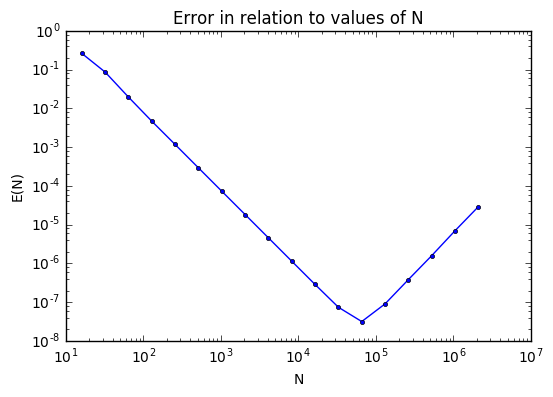

In [203]:
errors = []
n_vals = []
for i in np.arange(4,22):
    N = 2**i
    x = np.linspace(0,1,N+1)
    k = finite_element(x, eps, alpha, beta)
    
    errors.append(np.max(np.abs(sol(x) - k)))
    n_vals.append(N)

plt.loglog(n_vals, errors, '-o', markersize=3)
plt.title("Error in relation to values of N")
plt.ylabel("E(N)")
plt.xlabel("N")
plt.show()